<a href="https://colab.research.google.com/github/ptkoo/machineLearningJourney/blob/main/KNN_65011416_(_Paing_Thet_Ko_)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [101]:
np.random.seed(42)

num_samples = 40

# Class 0 data
x_1 = np.random.multivariate_normal([2, 2], [[1, .75],[.75, 1]], num_samples)
y_1 = np.zeros(num_samples)

# Class 1 data
x_2 = np.random.multivariate_normal([-1, -1], [[1, .75],[.75, 1]], num_samples)
y_2 = np.ones(num_samples)

# Class 2 data
x_3 = np.random.multivariate_normal([3, -2], [[1, 0],[-.5, 1]], num_samples)
y_3 = np.ones(num_samples)+1

# Combining the data
X = np.vstack((x_1, x_2, x_3))
y = np.hstack((y_1, y_2, y_3))
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


<ipython-input-101-dc66c610216e>:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x_3 = np.random.multivariate_normal([3, -2], [[1, 0],[-.5, 1]], num_samples)


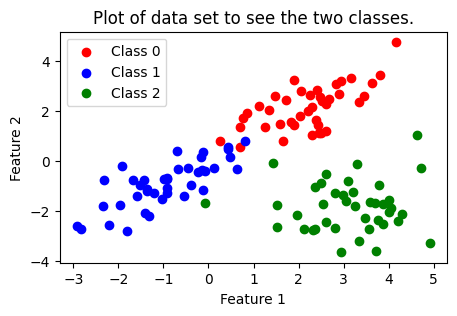

In [102]:
plt.figure(figsize=(5,3))
plt.scatter(x_1[:,0], x_1[:,1], color='red', label='Class 0')
plt.scatter(x_2[:,0], x_2[:,1], color='blue', label='Class 1')
plt.scatter(x_3[:,0], x_3[:,1], color='green', label='Class 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of data set to see the two classes.')
plt.legend()
plt.show()

In [103]:
y_reshaped = y.reshape(-1, 1)  #changing row to column matrix

# Concatenate X and y column-wise
concatenated = np.concatenate((X, y_reshaped), axis=1) #make new matrix containing both x and y. Axis 1 means hstack
print(concatenated)

[[ 1.58425027  1.48648264  0.        ]
 [ 0.85567048  1.93261522  0.        ]
 [ 2.30181034  2.13625051  0.        ]
 [ 0.25145253  0.79411083  0.        ]
 [ 2.24732913  2.63097702  0.        ]
 [ 2.59814789  2.26882722  0.        ]
 [ 2.45011174  1.0972183   0.        ]
 [ 3.81231155  3.41471422  0.        ]
 [ 2.83631355  3.05851997  0.        ]
 [ 3.34870351  2.35005399  0.        ]
 [ 0.70883509  0.54918714  0.        ]
 [ 2.4405577   1.4331086   0.        ]
 [ 2.47000635  2.54844047  0.        ]
 [ 2.9438266   3.20948521  0.        ]
 [ 2.66497536  2.45871673  0.        ]
 [ 1.90796577  3.21772423  0.        ]
 [ 2.38658278  1.63866821  0.        ]
 [ 1.6622131   0.79894628  0.        ]
 [ 2.49747401  1.11177798  0.        ]
 [ 3.17280333  3.31200524  0.        ]
 [ 1.24863993  1.3698156   0.        ]
 [ 2.2146353   2.00172283  0.        ]
 [ 3.63753404  3.12852732  0.        ]
 [ 2.05713897  2.80463726  0.        ]
 [ 2.30190335  1.0552457   0.        ]
 [ 1.83299435  1.56070006

In [104]:
df = pd.DataFrame(concatenated, columns=['Feature1', 'Feature2', 'Target'])
df

,Feature1,Feature2,Target
0,1.584250,1.486483,0.0
1,0.855670,1.932615,0.0
2,2.301810,2.136251,0.0
3,0.251453,0.794111,0.0
4,2.247329,2.630977,0.0
...,...,...,...
115,3.769211,-2.357922,2.0
116,2.605017,-2.422081,2.0
117,1.432270,-0.065300,2.0
118,4.907865,-3.280592,2.0


In [105]:
from sklearn.model_selection import train_test_split

# Features and target
y = df['Target']  # Series with the target variable
X = df[['Feature1', 'Feature2' ]]

# Split the data into training and testing sets
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy()
X_train = df_X_train.to_numpy()
y_train = df_y_train.to_numpy()

In [107]:
unique_classes = set(y.to_numpy())
unique_classes

{0.0, 1.0, 2.0}

In [108]:
y_train_reshaped = y_train.reshape(-1, 1)

# Concatenate X and y column-wise
concatenated_train = np.concatenate((X_train, y_train_reshaped), axis=1)
# print(concatenated_train)

## Section 1: KNN with Euclidean Distance

In [109]:
i = 0
feature1 = X_test[i][0]
feature2 = X_test[i][1]
feature1

-0.685922146347381

In [110]:
#concatenated_train


In [111]:
def calculateDistanceEuclidean(concatenated_train, feature1, feature2):
  # write this function and return distance list
  dist_value = []
  dist_class = []
  for i in range (concatenated_train.shape[0]): # Iterate through each row
    dist_value.append(np.sqrt(np.square(concatenated_train[i][0]-feature1) + np.square(concatenated_train[i][1]-feature2)))
    dist_class.append(concatenated_train[i][2])

  dist = np.vstack((dist_value,dist_class))
  distance = np.transpose(dist)

  return distance

In [112]:
distance_list = calculateDistanceEuclidean(concatenated_train, feature1, feature2)
print(distance_list)

[[0.62731986 1.        ]
 [4.26672965 0.        ]
 [4.38917901 0.        ]
 [4.99257222 2.        ]
 [0.24342591 1.        ]
 [3.9565014  2.        ]
 [3.29038406 0.        ]
 [3.1690559  1.        ]
 [5.53219905 0.        ]
 [3.69824221 2.        ]
 [1.24890172 1.        ]
 [1.49377119 2.        ]
 [4.19031939 0.        ]
 [3.20047964 1.        ]
 [6.32754987 2.        ]
 [4.83976794 0.        ]
 [3.64534561 0.        ]
 [3.14534867 0.        ]
 [1.97944154 1.        ]
 [4.67015575 0.        ]
 [5.05483195 2.        ]
 [4.94914149 2.        ]
 [4.18361307 0.        ]
 [3.23477547 2.        ]
 [0.53562713 1.        ]
 [3.64183944 0.        ]
 [0.80029921 1.        ]
 [3.1063027  0.        ]
 [3.64532286 0.        ]
 [0.70476809 1.        ]
 [3.11770669 0.        ]
 [3.86457572 2.        ]
 [5.84846294 0.        ]
 [1.91399486 1.        ]
 [1.05319448 1.        ]
 [0.73101724 1.        ]
 [3.98996129 2.        ]
 [2.18795528 0.        ]
 [5.30121994 0.        ]
 [4.75796014 2.        ]


In [113]:
def sortDistanceList(distance_list):
  # write this function and return sorted distance list
  distance_sorted = distance_list[distance_list[:,0].argsort()]  #sort list according to the claculated distance
  return distance_sorted

In [114]:
distance_sorted = sortDistanceList(distance_list) # Ascending order
print(distance_sorted)

[[0.24342591 1.        ]
 [0.45871917 1.        ]
 [0.47826678 1.        ]
 [0.49049526 1.        ]
 [0.53562713 1.        ]
 [0.62731986 1.        ]
 [0.70277317 1.        ]
 [0.70476809 1.        ]
 [0.73101724 1.        ]
 [0.80029921 1.        ]
 [0.81419644 1.        ]
 [0.87806714 1.        ]
 [1.03554242 1.        ]
 [1.05319448 1.        ]
 [1.06588593 1.        ]
 [1.08217522 1.        ]
 [1.099791   1.        ]
 [1.24890172 1.        ]
 [1.24964228 1.        ]
 [1.26118349 1.        ]
 [1.39546717 1.        ]
 [1.4351314  1.        ]
 [1.45827961 0.        ]
 [1.49377119 2.        ]
 [1.88649081 1.        ]
 [1.91399486 1.        ]
 [1.97944154 1.        ]
 [2.13380879 2.        ]
 [2.18795528 0.        ]
 [2.215835   1.        ]
 [2.50271014 0.        ]
 [2.57062482 0.        ]
 [2.60239774 0.        ]
 [2.63543241 2.        ]
 [2.70549436 1.        ]
 [2.7299747  1.        ]
 [2.73207803 0.        ]
 [3.1063027  0.        ]
 [3.11220851 0.        ]
 [3.11770669 0.        ]


In [115]:
k=5
distance_sorted_k = distance_sorted[:k]
expected_array = [[0.24342591120588192, 1.0], [0.45871917392826284, 1.0], [0.47826677647289073, 1.0], [0.4904952649726137, 1.0], [0.5356271266554974, 1.0]]
assert np.allclose(distance_sorted_k, expected_array)

In [116]:
def findKNearestNeighbours( distance_sorted, k ):
  # write this function and return nearest_neighbour_group
  KNN_list = distance_sorted[:k]  #Get Nearest list of K elements
  Target = KNN_list[:,1]      #Target column
  classes, count = np.unique(Target, return_counts = True) #count unique classes in Target
  print(Target)
  print(classes)
  print(count)
  sorted_classes = classes[np.argsort(count)]    #sort classes according to count ( ascending order)
  nearest_neighbour_group = sorted_classes[-1] # The class with the highest count is the nearest neighbour group

  return nearest_neighbour_group

In [117]:
nearest_neighbour_class = findKNearestNeighbours(distance_sorted, 5)
assert nearest_neighbour_class == 1
#nearest_neighbour_class

[1. 1. 1. 1. 1.]
[1.]
[5]


In [118]:
def runPredictionEuclidean(dataset, concatenated_train):
  # write this function and return a numpy array of predictions
  prediction = []
  for i in range(dataset.shape[0]):
    distance = calculateDistanceEuclidean(concatenated_train,dataset[i][0],dataset[i][1])  #calculate distence to each data in dataset ( Feature 1, feature 2)
    distance_sorted = sortDistanceList(distance)  #sort the distances
    nearest_neighbour_class = findKNearestNeighbours(distance_sorted, 5) #find KNN
    prediction.append(nearest_neighbour_class)

  return np.array(prediction)

In [119]:
# make prediction on the test dataset.
predictions = runPredictionEuclidean(X_test, concatenated_train)
expected_array = np.array([1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1])
assert np.allclose(predictions, expected_array)

[1. 1. 1. 1. 1.]
[1.]
[5]
[1. 1. 2. 1. 1.]
[1. 2.]
[4 1]
[0. 0. 0. 0. 0.]
[0.]
[5]
[1. 0. 0. 1. 0.]
[0. 1.]
[3 2]
[0. 0. 0. 0. 0.]
[0.]
[5]
[1. 1. 1. 1. 1.]
[1.]
[5]
[1. 1. 1. 1. 2.]
[1. 2.]
[4 1]
[1. 1. 0. 0. 1.]
[0. 1.]
[2 3]
[1. 1. 1. 1. 1.]
[1.]
[5]
[2. 2. 2. 2. 2.]
[2.]
[5]
[0. 0. 0. 0. 0.]
[0.]
[5]
[1. 1. 1. 1. 1.]
[1.]
[5]
[0. 0. 0. 0. 0.]
[0.]
[5]
[0. 0. 0. 0. 0.]
[0.]
[5]
[2. 2. 2. 2. 2.]
[2.]
[5]
[2. 2. 2. 2. 2.]
[2.]
[5]
[2. 2. 2. 2. 2.]
[2.]
[5]
[0. 0. 0. 0. 0.]
[0.]
[5]
[2. 2. 2. 2. 2.]
[2.]
[5]
[2. 0. 0. 0. 0.]
[0. 2.]
[4 1]
[1. 1. 0. 1. 1.]
[0. 1.]
[1 4]
[1. 1. 1. 1. 1.]
[1.]
[5]
[0. 0. 0. 0. 0.]
[0.]
[5]
[1. 1. 1. 1. 1.]
[1.]
[5]


In [120]:
def accuracy(predictions, target):
  # write this function and return the accuracy of the predictions
  comparison = np.where(predictions == target, 1, 0)
  acc = comparison.sum() / comparison.size

  return acc

In [121]:
acc = accuracy(predictions, y_test)
assert acc == 0.875

In [122]:
X_test[0][0]

-0.685922146347381

## Section 2: KNN with Any Number of Features and Number of Categories

In [123]:
def calculateDistanceEuclidean_nFeatures(concatenated_train, feature_array ):
  # write this function and return sorted distance list for features with any dimensions
  n = X_test.shape[1] # number of features
  dist_value = []
  dist_class = []

  for i in range (concatenated_train.shape[0]):
    square = 0
    for j in range (n):
      square += np.square(concatenated_train[i][j]-feature_array[j])

    dist_value.append(np.sqrt(square))
    dist_class.append(concatenated_train[i][n])   #Take last column of the X_test for class/target

  dist = np.vstack((dist_value,dist_class))
  distance = np.transpose(dist)

  return distance

In [124]:
distance_list = calculateDistanceEuclidean_nFeatures(concatenated_train, X_test[0] )

In [125]:
distance_sorted = sortDistanceList(distance_list)

In [126]:
k=5
distance_sorted_k = distance_sorted[:k]
expected_array = [[0.24342591120588192, 1.0], [0.45871917392826284, 1.0], [0.47826677647289073, 1.0], [0.4904952649726137, 1.0], [0.5356271266554974, 1.0]]
assert np.allclose(distance_sorted_k, expected_array)

In [127]:
unique_classes

{0.0, 1.0, 2.0}

In [128]:
def findKNearestNeighboursMultiClass( distance_sorted, k, unique_classes ):
  # write this function and return the nearest neighbour group for features with any dimensions

  KNN_list = distance_sorted[:k]  #Get Nearest list of K elements
  Target = KNN_list[:,1]      #Target column
  classes, count = np.unique(Target, return_counts = True) #count unique classes in Target

  sorted_classes = classes[np.argsort(count)]    #sort classes according to count
  nearest_neighbour_group = sorted_classes[-1] # the class label with the highest count(majority)

  return nearest_neighbour_group

In [129]:
nearest_neighbour_group = findKNearestNeighboursMultiClass( distance_sorted, k, unique_classes )
assert nearest_neighbour_group == 1

In [130]:
X_test.shape

(24, 2)

In [131]:
def runPredictionEuclideanMultiClass(dataset, concatenated_train, unique_classes):
  # write this function and return the predictions for features with any dimensions
  prediction = []
  for i in range(dataset.shape[0]):
    distance = calculateDistanceEuclidean_nFeatures(concatenated_train,dataset[i])  #calculate distence to each data in dataset
    distance_sorted = sortDistanceList(distance)  #sort the distances
    nearest_neighbour_class = findKNearestNeighbours(distance_sorted, 5) #find KNN
    prediction.append(nearest_neighbour_class)

  return np.array(prediction)

In [132]:
predictions = runPredictionEuclideanMultiClass(X_test, concatenated_train, unique_classes)
expected_array = np.array([1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1])
assert np.allclose(predictions, expected_array)

[1. 1. 1. 1. 1.]
[1.]
[5]
[1. 1. 2. 1. 1.]
[1. 2.]
[4 1]
[0. 0. 0. 0. 0.]
[0.]
[5]
[1. 0. 0. 1. 0.]
[0. 1.]
[3 2]
[0. 0. 0. 0. 0.]
[0.]
[5]
[1. 1. 1. 1. 1.]
[1.]
[5]
[1. 1. 1. 1. 2.]
[1. 2.]
[4 1]
[1. 1. 0. 0. 1.]
[0. 1.]
[2 3]
[1. 1. 1. 1. 1.]
[1.]
[5]
[2. 2. 2. 2. 2.]
[2.]
[5]
[0. 0. 0. 0. 0.]
[0.]
[5]
[1. 1. 1. 1. 1.]
[1.]
[5]
[0. 0. 0. 0. 0.]
[0.]
[5]
[0. 0. 0. 0. 0.]
[0.]
[5]
[2. 2. 2. 2. 2.]
[2.]
[5]
[2. 2. 2. 2. 2.]
[2.]
[5]
[2. 2. 2. 2. 2.]
[2.]
[5]
[0. 0. 0. 0. 0.]
[0.]
[5]
[2. 2. 2. 2. 2.]
[2.]
[5]
[2. 0. 0. 0. 0.]
[0. 2.]
[4 1]
[1. 1. 0. 1. 1.]
[0. 1.]
[1 4]
[1. 1. 1. 1. 1.]
[1.]
[5]
[0. 0. 0. 0. 0.]
[0.]
[5]
[1. 1. 1. 1. 1.]
[1.]
[5]


## Section 3: KNN with Real Dataset (Iris)

In [133]:
# Download Iris Dataset from: https://www.kaggle.com/datasets/uciml/iris


In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
df_iris = pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [136]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [137]:
# Features and target
y = df_iris['Species']  # Series with the target variable
X = df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]

# Split the data into training and testing sets
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
df_y_test.values

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [139]:
def prepareInputData(df_X_train, df_X_test, df_y_train, df_y_test):
  # prepare X_text as numpy array
  # prepare concatenated_train as numpy array containing X_train and y_train
  # return the unqiue classes
  X_test = df_X_test.to_numpy()
  y_test = df_y_test.to_numpy()
  X_train = df_X_train.to_numpy()
  y_train = df_y_train.to_numpy()

  unique_classes = set(y.to_numpy())
  unique_classes

  y_train_reshaped = y_train.reshape(-1, 1)
  concatenated_train = np.concatenate((X_train, y_train_reshaped), axis=1)

  return X_test, concatenated_train, unique_classes

In [140]:
X_test, concatenated_train, unique_classes = prepareInputData(df_X_train, df_X_test, df_y_train, df_y_test)


In [141]:
unique_classes

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [142]:
predictions = runPredictionEuclideanMultiClass(X_test,concatenated_train, unique_classes)
assert predictions[0] == 'Iris-versicolor'
assert predictions[1] == 'Iris-setosa'
assert predictions[2] == 'Iris-virginica'

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor']
['Iris-versicolor']
[5]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
['Iris-setosa']
[5]
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']
['Iris-virginica']
[5]
['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor']
['Iris-versicolor']
[5]
['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor']
['Iris-versicolor']
[5]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
['Iris-setosa']
[5]
['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor']
['Iris-versicolor']
[5]
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']
['Iris-virginica']
[5]
['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']
['Iris-versicolor' 'Iris-virginica'

In [143]:
acc = accuracy(predictions, df_y_test.values)
assert acc == 1.0

In [144]:
predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [145]:
df_y_test.values

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)